In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

In [15]:
pip install example -i http://pypi.douban.com/simple --trusted-host pypi.douban.com

Looking in indexes: http://pypi.douban.com/simple
  Created wheel for example: filename=example-0.1.0-py3-none-any.whl size=1239 sha256=ec9f969fd6ef78ff430a8ce5b62c5b11cd57d12d76b29fbdde60d684e71ff486
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\0f\82\b1\0a95d2ec08bb0a3f6e76529ec81e388f032a6ddd6d64863193
Successfully built example
Note: you may need to restart the kernel to use updated packages.


In [18]:
from pyecharts.charts import Bar
from pyecharts import options as opts
from pyecharts.globals import ThemeType

name = filled_df['地市名称']
list1 = filled_df['非老龄化程度']
list2 = filled_df['高学历人口占比']

In [2]:
data1 = pd.read_excel(r'C:\Users\Administrator\Desktop/新城市活力归一化.xlsx')
filled_df = data1.copy()
#filled_df.loc[:, '接待入境游客人数（人次）'].replace([0], [41519], inplace=True)
#filled_df['全社会R&D支出占GDP比重'] = filled_df['全社会R&D支出占GDP比重'].str.strip('%').astype(float) / 100
#filled_df = filled_df.drop(['编号'],axis = 1)
filled_df.set_index(['地市名称'], inplace=True)
#filled_df = filled_df.apply(lambda x : x.astype('float64'))
filled_df.head(10)

人均公共绿地面积（平方米）   全年晴天天数  舒适度指数  空气质量优良天数     常住人口密度     非老龄化程度  \
地市名称                                                                  
郑州市        7.000000  8.59375      7  4.737288  10.000000  10.000000   
开封市        1.692308  9.71875      7  5.271186   1.823608   3.260664   
洛阳市        1.000000  6.62500      4  5.805085   4.374113   4.764218   
平顶山市       3.769231  4.65625      7  7.330508   3.594525   4.753555   
安阳市        1.461538  8.03125      4  1.000000   3.838242   3.911137   
鹤壁市        7.692308  8.59375      7  4.127119   2.016036   6.225118   
新乡市        1.230769  7.46875      7  5.423729   4.142050   3.900474   
焦作市        8.384615  6.62500      4  3.211864   3.179289   4.902844   
濮阳市        7.692308  7.75000      7  4.279661   4.688705   6.694313   
许昌市       10.000000  7.46875      7  6.720339   2.185368   2.109005   

        高学历人口占比  新增常住人口全省占比     短期流动规模     短期流动广度  ...  万人拥有商业服务设施数量  \
地市名称                                               ...                 
郑州市   10.000000   10.000000  10.000000  10.000000  ...      4.766154   
开封市    3.386804    1.284710   2.450372   2.683996  ...      5.396153   
洛阳市    5.257057    2.767387   3.086124   4.176814  ...     10.000000   
平顶山市   3.586092    1.161500   1.894496   2.362742  ...      5.907958   
安阳市    3.001109    1.646262   2.116587   2.945643  ...      5.243959   
鹤壁市    4.059112    1.256056   1.265818   1.323998  ...      1.209805   
新乡市    3.616498    1.493879   2.632423   3.344660  ...      9.529198   
焦作市    4.210914    1.714249   1.873658   2.340728  ...      4.966449   
濮阳市    3.498004    1.942693   1.650539   2.314457  ...      5.373426   
许昌市    3.300082    1.329773   2.061391   2.362504  ...      1.000000   

         夜间活力占比      微博活跃度  万人拥有微信公众号量     百度搜索指数  万人知网论文阅读量     文化热度指数  \
地市名称                                                                      
郑州市   10.000000  10.000000    5.546104  10.000000  10.000000   4.962169   
开封市    3.673464   1.819755    2.716211   1.885355   8.244077   5.366444   
洛阳市    7.013155   2.570296    8.046389   4.531065   3.914859  10.000000   
平顶山市   6.141274   1.988464    5.258773   1.228550   6.284629   1.546758   
安阳市    7.900308   4.281182    7.053887   1.610947   3.663944   2.981218   
鹤壁市    1.070274   1.058399    5.473264   1.153107   1.338693   1.542368   
新乡市    6.732258   3.630137   10.000000   1.877959   8.026197   2.443520   
焦作市    9.966474   2.704398    5.874698   1.000000   6.971923   4.305711   
濮阳市    8.355455   1.136265    6.362247   1.309172   2.012966   1.000000   
许昌市    3.300234   2.490267    3.895475   1.504438   2.973228   1.329101   

         蜜雪冰城指数      胡辣汤指数       烩面指数  
地市名称                                   
郑州市   10.000000  10.000000   5.321217  
开封市    4.403763   6.346941   6.136889  
洛阳市    3.239214   4.230283   2.916074  
平顶山市   2.935982   6.029926   7.044373  
安阳市    3.222563   3.293221   7.068065  
鹤壁市    1.962917   4.306540   1.734420  
新乡市    4.742534   5.349337  10.000000  
焦作市    4.274356   5.591594   6.074869  
濮阳市    6.670305   4.227314   4.441467  
许昌市    2.824978   5.830970   7.394317  

[10 rows x 30 columns]

In [10]:
listMon_r = name[::-1]
list1_r = list1[::-1]
list2_r = list2[::-1]

In [3]:
from pyecharts.charts import Bar
from pyecharts import options as opts
bar = (
    Bar()
    .add_xaxis(filled_df['地市名称'].tolist())
    .add_yaxis("非老龄化程度", filled_df['非老龄化程度'].tolist(), color="#1565C0")
    .add_yaxis("高学历人口占比", filled_df['高学历人口占比'].tolist(), color="#80CBC4")
    .set_global_opts(title_opts=opts.TitleOpts(title="人口结构", subtitle="学历和年龄占比"),
                     yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size = 15)),
                    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.TextStyleOpts(font_size = 12)))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False),
                     markpoint_opts=opts.MarkPointOpts(
         data=[opts.MarkPointItem(type_="max"), opts.MarkPointItem(type_="min")]), 
         markline_opts=opts.MarkLineOpts(
            data=[
                opts.MarkLineItem(type_="average", name="平均值"),
            ])
 )
.reversal_axis()
)
bar.render_notebook()


In [4]:
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.faker import Faker

c = (
    Map()
    .add("商家A", [list(z) for z in zip(Faker.guangdong_city, Faker.values())], "广东")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Map-广东地图"), visualmap_opts=opts.VisualMapOpts()
    )
    .render("map_guangdong.html")
)

# 空值填充

In [27]:
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler

updated_df6=filled_df.copy()
scaler = MinMaxScaler()
updated_df6 = pd.DataFrame(scaler.fit_transform(updated_df6), columns = updated_df6.columns)
updated_df6.head(10)
#k = 9为最佳

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=11)
updated_df7 = pd.DataFrame(imputer.fit_transform(updated_df6),columns = updated_df6.columns)
updated_df7.tail(10)

人均公共绿地面积（平方米）   全年晴天天数     舒适度指数  ...    蜜雪冰城指数     胡辣汤指数      烩面指数
8        0.743590  0.75000  0.666667  ...  0.070968  0.030231  0.072760
9        1.000000  0.71875  0.666667  ...  0.045161  0.080350  0.201420
10       0.948718  1.00000  0.666667  ...  0.032258  0.143198  0.174800
11       0.307692  0.87500  0.000000  ...  0.045161  0.022275  0.004437
12       0.615385  0.09375  1.000000  ...  0.129032  0.128878  0.291038
13       0.641026  0.78125  0.666667  ...  0.038710  0.049324  0.220941
14       0.564103  0.00000  1.000000  ...  0.090323  0.000000  0.021295
15       0.512821  0.62500  0.333333  ...  0.109677  0.120127  0.262644
16       0.871795  0.37500  0.333333  ...  0.045161  0.062848  0.100266
17       0.282051  0.15625  0.333333  ...  0.000000  0.038186  0.047028

[10 rows x 30 columns]

In [7]:
#k值选择对比 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

def optimize_k(data, target):
    errors = []
    for k in range(1, 20, 2):
        scaler = MinMaxScaler()
        sclaed_df = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
        imputer = KNNImputer(n_neighbors=k)
        imputed_df = pd.DataFrame(imputer.fit_transform(data),columns = data.columns)
        
        X = imputed_df.drop(target, axis=1)
        y = imputed_df[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
        
    return errors

In [20]:
import pandas as pd
import numpy as np

temp = updated_df6
k_errors = optimize_k(data=temp, target='营商环境指数')
print(k_errors)
#k=5时R

[{'K': 1, 'RMSE': 0.36362419354909353}, {'K': 3, 'RMSE': 0.36081851876101695}, {'K': 5, 'RMSE': 0.3673379395960164}, {'K': 7, 'RMSE': 0.35893735381030073}, {'K': 9, 'RMSE': 0.3621809924895741}, {'K': 11, 'RMSE': 0.34746001191965914}, {'K': 13, 'RMSE': 0.35494760715996965}, {'K': 15, 'RMSE': 0.35439816608153824}, {'K': 17, 'RMSE': 0.3655537418082958}, {'K': 19, 'RMSE': 0.36456624438875934}]


In [32]:
#填充空值
filled_df['营商环境指数'] = filled_df['营商环境指数'].fillna(11.00091)

#相关性分析

In [47]:
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

--2021-10-19 03:54:49--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M   713KB/s    in 10s     

2021-10-19 03:55:02 (958 KB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]



In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [17]:
corr = filled_df.corr()
corr.to_excel('城市活力相关性.xls')

<ipython-input-17-65c068726f8e>:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  corr.to_excel('城市活力相关性.xls')


In [13]:
data2 = pd.read_excel(r'C:\Users\Administrator\Desktop/新城市活力归一化.xlsx', sheet_name = '实空间相关性')
data2.set_index('指标',drop = True,inplace = True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 人均公共绿地面积（平方米） to 烩面指数
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   高铁联系指数        30 non-null     float64
 1   通勤时间指数        30 non-null     float64
 2   万人拥有体育设施数量    30 non-null     float64
 3   万人拥有文化旅游设施数量  30 non-null     float64
 4   万人拥有商业服务设施数量  30 non-null     float64
 5   夜间活力占比        30 non-null     float64
dtypes: float64(6)
memory usage: 1.6+ KB


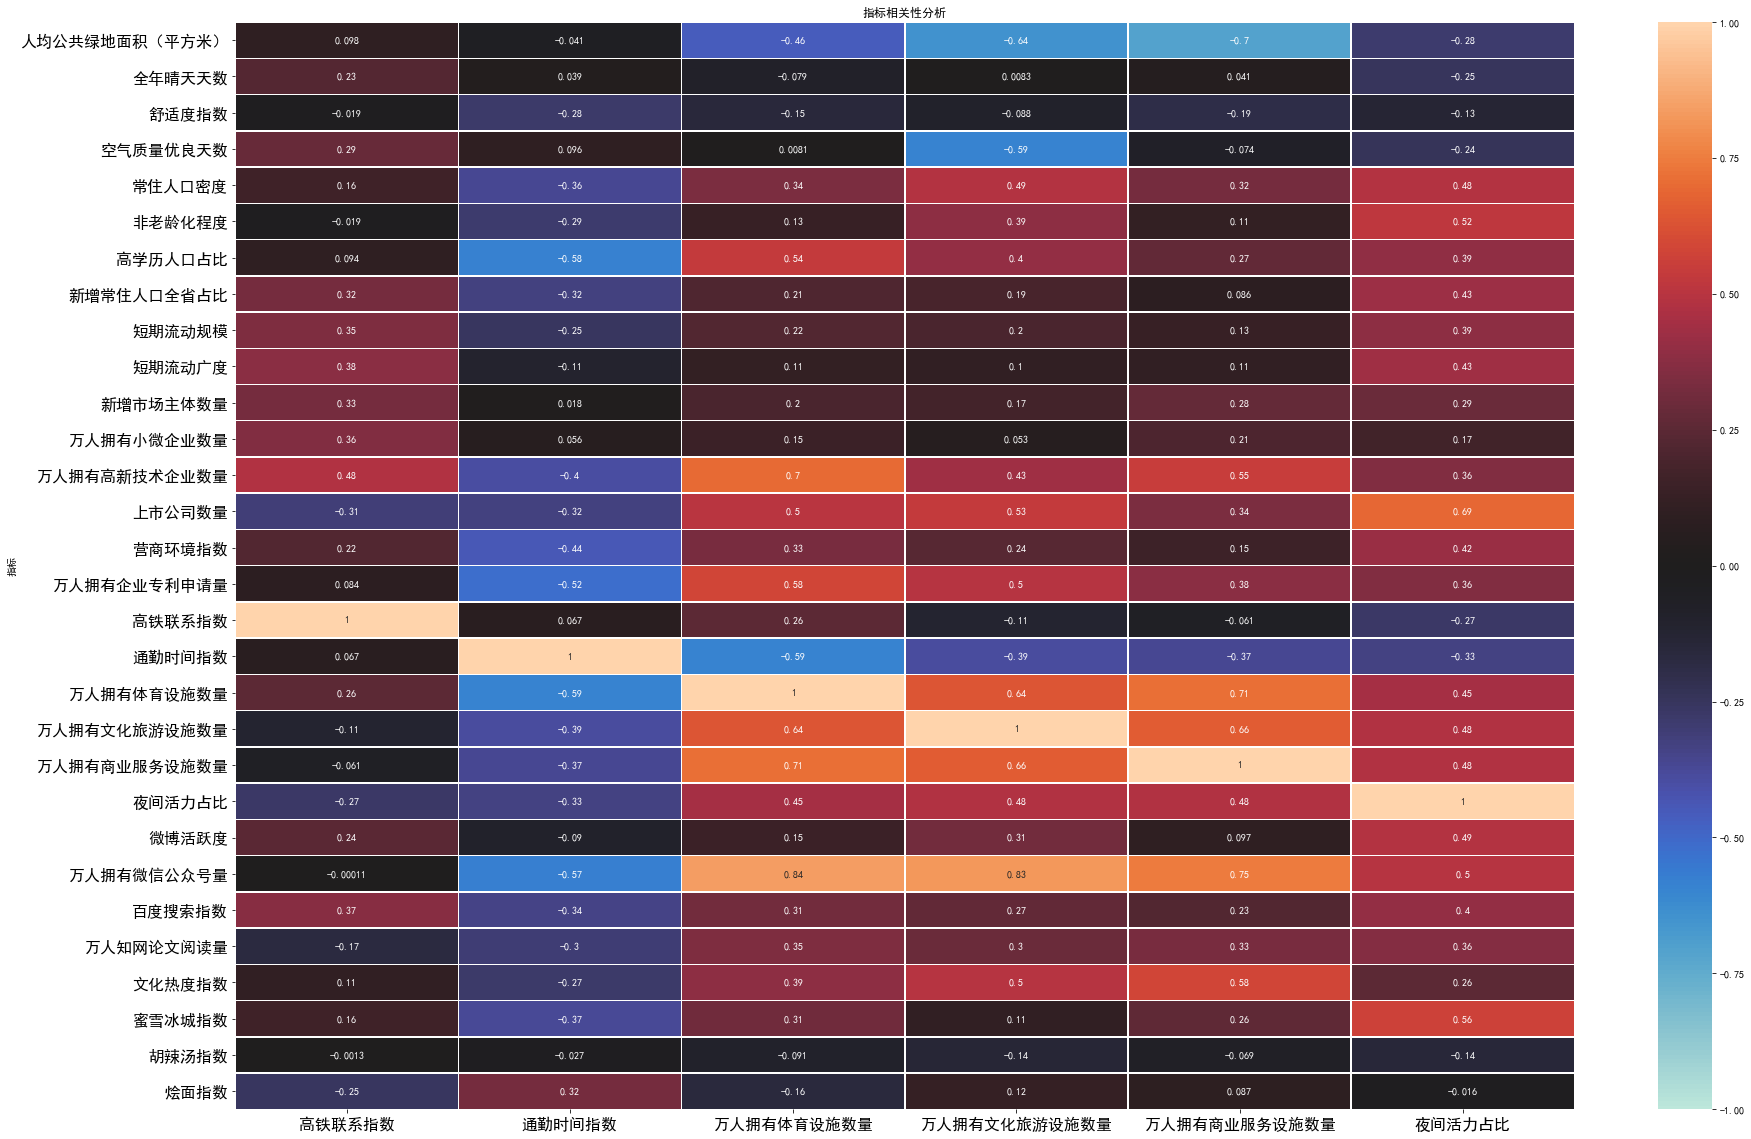

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 20)
#sns.set(font=zhfont.get_name())

plt.tick_params(axis='both',which='major',labelsize=16)

fig = sns.heatmap(data2, vmin=-1, vmax=1,annot=True, center=0, linewidths=0.5)
fig.set_title("指标相关性分析")
heatmap = fig.get_figure()

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

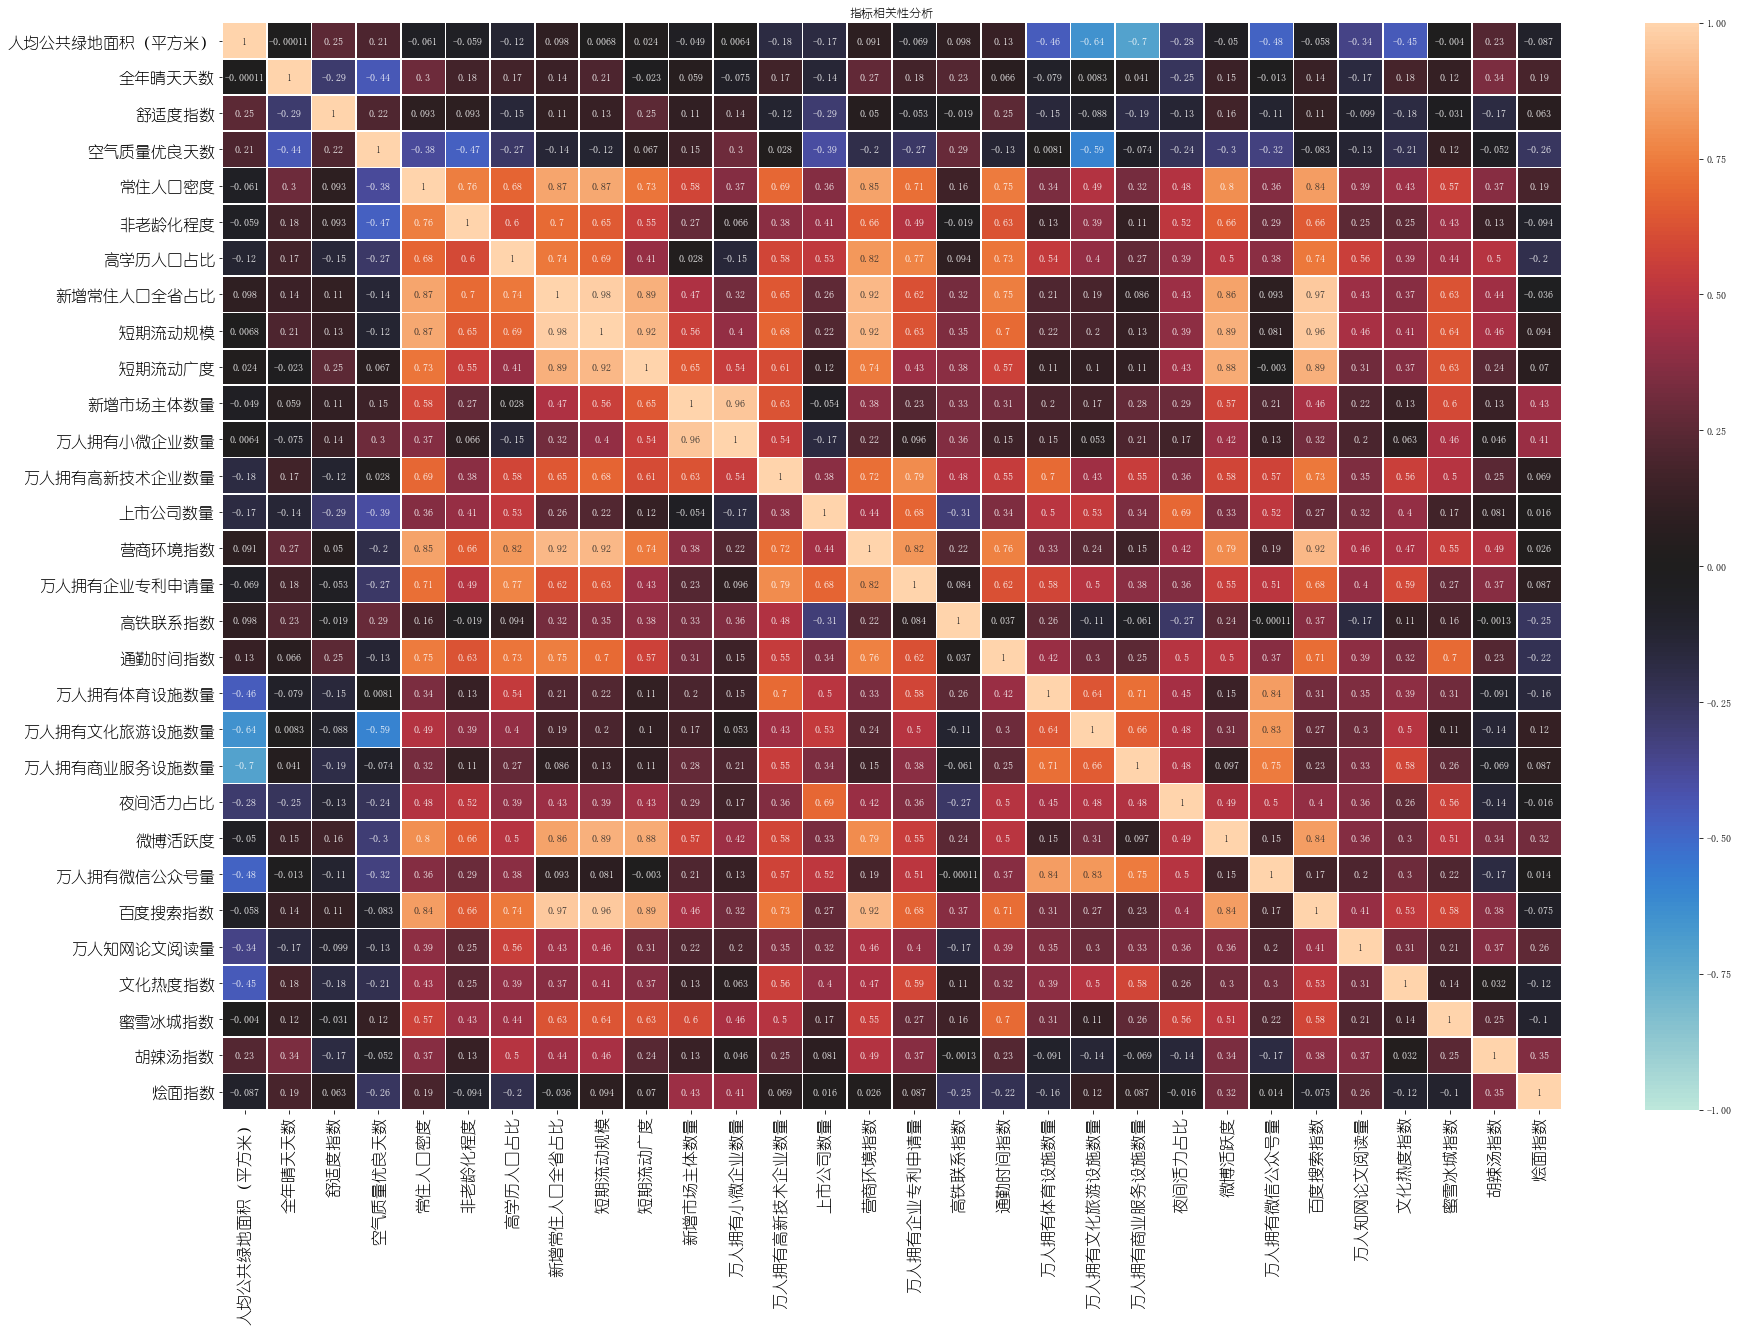

In [48]:
corr = filled_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(30, 20)
#sns.set(font=zhfont.get_name())

plt.tick_params(axis='both',which='major',labelsize=16)

fig = sns.heatmap(corr, vmin=-1, vmax=1,annot=True, center=0, linewidths=0.7)
fig.set_title("指标相关性分析")
heatmap = fig.get_figure()

In [65]:
heatmap.savefig('corr.jpeg',dpi = 800,bbox_inches='tight', pad_inches=0)

In [63]:
import os
print(os.getcwd())

C:\Users\Administrator\Downloads


# 聚类

## 总分类

In [5]:
# 3 clusters
df_norm = filled_df.apply(preprocessing.scale,axis=0)
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_norm)
# Cluster membership
memb = pd.Series(kmeans.labels_, index=df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  平顶山市, 安阳市, 焦作市, 濮阳市, 三门峡市, 南阳市, 信阳市, 济源市
1 :  开封市, 鹤壁市, 许昌市, 漯河市, 商丘市, 周口市, 驻马店市
2 :  洛阳市, 新乡市
3 :  郑州市


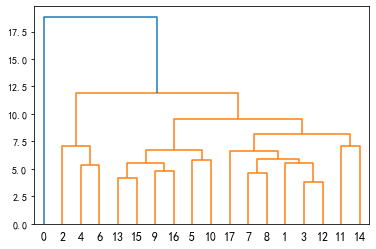

In [15]:
kmeanscluster = KMeans(n_clusters= 4, init = 'k-means++')
kmeanscluster.fit(df_norm)
Y_pred = kmeanscluster.predict(df_norm)

""" now trying Dendrogram """
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(df_norm, method= 'ward', metric = 'euclidean'))
# Selecting 3



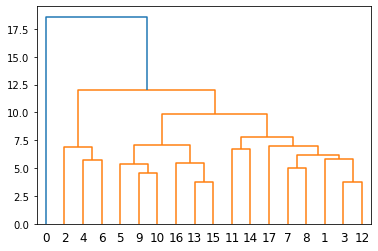

In [14]:
from scipy.cluster.hierarchy import linkage,dendrogram  # scipy中的层次聚类

Z=linkage(filled_df,method='ward',metric='euclidean')
#method={ ‘single’,‘complete’, ‘average’, ‘weighted’, ‘centroid’, ‘median’,‘ward’ }
#metric={ ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’}
P=dendrogram(Z,0) #系统树图
plt.show()  # 画出聚类图


In [6]:
import plotly.figure_factory as ff
names = df_norm.index
fig = ff.create_dendrogram(filled_df, orientation='left', labels=filled_df.index)
fig.update_layout(width=800, height=800)
fig.show()
#fig.savefig('总.jpeg',dpi = 800)

NameError: name 'df_norm' is not defined

# 自然

In [8]:
nature = filled_df[filled_df.columns[0:4]]
nature.head()

人均公共绿地面积（平方米）  全年晴天天数  舒适度指数  空气质量优良天数
地市名称                                        
郑州市            14.5   132.0    6.0     230.0
开封市            12.2   136.0    6.0     237.0
洛阳市            11.9   125.0    5.0     244.0
平顶山市           13.1   118.0    6.0     264.0
安阳市            12.1   130.0    5.0     181.0

In [16]:
nature_norm = nature.apply(preprocessing.scale,axis=0)
names = nature_norm.index
fig = ff.create_dendrogram(nature_norm, orientation='left', labels=names)
fig.update_layout(width=800, height=800)
fig.show()

In [26]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=nature_norm.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

   人均公共绿地面积（平方米）  全年晴天天数  舒适度指数  空气质量优良天数
0         -0.167  -0.464 -0.894     0.621
1          0.888   0.599  0.256    -0.396
2          0.249  -1.990  1.789     1.242
3         -1.470   0.526 -0.224    -0.704


In [29]:
withinClusterSS = [0] * 4
clusterCount = [0] * 4
for cluster, distance in zip(kmeans.labels_, kmeans.transform(nature_norm)):
    withinClusterSS[cluster] += distance[cluster]**2
    clusterCount[cluster] += 1
for cluster, withClustSS in enumerate(withinClusterSS):
    print('Cluster {} ({} members): {:5.2f} within cluster'.format(cluster, 
        clusterCount[cluster], withinClusterSS[cluster]))

Cluster 0 (5 members): 11.73 within cluster
Cluster 1 (7 members):  5.99 within cluster
Cluster 2 (2 members):  1.62 within cluster
Cluster 3 (4 members):  6.46 within cluster


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

人均公共绿地面积（平方米）    全年晴天天数     舒适度指数  空气质量优良天数    cluster
0      -0.167014 -0.464017 -0.894427  0.620606  Cluster 0
1       0.888371  0.599341  0.255551 -0.395827  Cluster 1
2       0.248744 -1.989505  1.788854  1.241637  Cluster 2
3      -1.470255  0.525926 -0.223607 -0.703878  Cluster 3

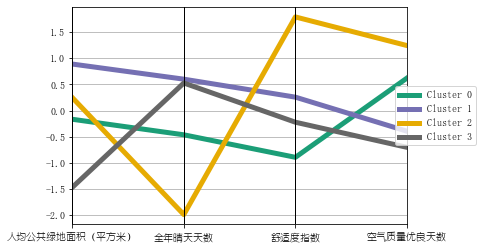

In [31]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
import matplotlib
matplotlib.rc("font",family='YouYuan')

ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))

centroids

# 人

In [4]:
pop = filled_df[filled_df.columns[5:10]]
pop.head()

非老龄化程度    高学历人口占比  新增常住人口全省占比     短期流动规模     短期流动广度
地市名称                                                        
郑州市   10.000000  10.000000   10.000000  10.000000  10.000000
开封市    3.260664   3.386804    1.284710   2.450372   2.683996
洛阳市    4.764218   5.257057    2.767387   3.086124   4.176814
平顶山市   4.753555   3.586092    1.161500   1.894496   2.362742
安阳市    3.911137   3.001109    1.646262   2.116587   2.945643

In [22]:
pop_norm = pop.apply(preprocessing.scale,axis=0)
kmeans = KMeans(n_clusters=4, random_state=0).fit(pop_norm)
# Cluster membership
memb = pd.Series(kmeans.labels_, index=pop_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  许昌市, 漯河市, 三门峡市, 信阳市, 驻马店市
1 :  郑州市
2 :  洛阳市, 安阳市, 鹤壁市, 新乡市, 焦作市, 濮阳市, 济源市
3 :  开封市, 平顶山市, 南阳市, 商丘市, 周口市


In [7]:

import plotly.figure_factory as ff
names = pop.index
fig = ff.create_dendrogram(pop, orientation='left', labels=names)
fig.update_layout(width=800, height=800)
fig.show()

# 企业

In [37]:
company = filled_df[filled_df.columns[10:16]]

company_norm = company.apply(preprocessing.scale,axis=0)
kmeans = KMeans(n_clusters=4, random_state=0).fit(company_norm)
# Cluster membership
memb = pd.Series(kmeans.labels_, index=company_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  开封市, 鹤壁市, 漯河市, 商丘市, 信阳市, 济源市
1 :  平顶山市, 安阳市, 新乡市, 濮阳市, 南阳市, 周口市, 驻马店市
2 :  郑州市
3 :  洛阳市, 焦作市, 许昌市, 三门峡市


In [38]:
company.head()

新增市场主体数量  万人拥有小微企业数量  万人拥有高新技术企业数量    上市公司数量  营商环境指数  万人拥有企业专利申请量
地市名称                                                                     
郑州市   689.321733  660.192298      6.256205  0.040497   31.61    69.556770
开封市   406.159253  457.075363      1.083199  0.005762   12.34    14.582816
洛阳市   453.023055  467.060069      5.438363  0.047051   16.35    61.934012
平顶山市  556.132438  602.380038      2.437620  0.028791   11.58    25.367420
安阳市   476.538146  491.468417      1.983742  0.029831   10.33    19.072677

In [39]:
names = company_norm.index
fig = ff.create_dendrogram(company_norm, orientation='left', labels=names)
fig.update_layout(width=800, height=800)
fig.show()

# "实"空间

In [43]:
real = filled_df[filled_df.columns[16:22]]

real_norm = real.apply(preprocessing.scale,axis=0)
kmeans = KMeans(n_clusters=3, random_state=0).fit(real_norm)
# Cluster membership
memb = pd.Series(kmeans.labels_, index=real_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  开封市, 平顶山市, 安阳市, 焦作市, 濮阳市, 南阳市, 济源市
1 :  鹤壁市, 许昌市, 漯河市, 商丘市, 周口市, 驻马店市
2 :  郑州市, 洛阳市, 新乡市, 三门峡市, 信阳市


In [41]:
real.head()

高铁联系指数       通勤时间指数  万人拥有体育设施数量  万人拥有文化旅游设施数量  万人拥有商业服务设施数量    夜间活力占比
地市名称                                                                         
郑州市   1.016356  3753.625000    6.337200     27.432461    260.582902  0.572418
开封市   0.322655  2259.166667    4.592072     23.167781    269.151878  0.547581
洛阳市   0.729297  2435.857143    7.026349     33.457497    331.771487  0.560692
平顶山市  0.518234  1933.857143    6.017274     26.660269    276.113244  0.557269
安阳市   0.686106  1875.500000    5.861735     36.192110    267.081811  0.564175

In [42]:
names = real_norm.index
fig = ff.create_dendrogram(real_norm, orientation='left', labels=names)
fig.update_layout(width=800, height=800)
fig.show()

# “虚”空间

In [17]:
virtual = filled_df[filled_df.columns[22:26]]

virtual_norm = virtual.apply(preprocessing.scale,axis=0)
kmeans = KMeans(n_clusters=3, random_state=0).fit(virtual_norm)
# Cluster membership
memb = pd.Series(kmeans.labels_, index=virtual_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  开封市, 鹤壁市, 许昌市, 漯河市, 商丘市, 信阳市, 周口市, 驻马店市
1 :  洛阳市, 平顶山市, 安阳市, 新乡市, 焦作市, 濮阳市, 三门峡市, 南阳市, 济源市
2 :  郑州市


In [52]:
virtual.head()

微博活跃度  万人拥有微信公众号量   百度搜索指数     万人知网论文阅读量
地市名称                                          
郑州市   41.74   16.086638  13616.0  56978.238491
开封市    3.92   10.866559   2645.0  46470.966813
洛阳市    7.39   20.698714   6222.0  20565.342691
平顶山市   4.70   15.556622   1757.0  34745.815739
安阳市   15.30   18.867925   2274.0  19063.889925

In [18]:
names = virtual_norm.index
fig = ff.create_dendrogram(virtual_norm, orientation='left', labels=names)
fig.update_layout(width=800, height=800)
fig.show()

In [19]:
virtual = filled_df[filled_df.columns[26:30]]

virtual_norm = virtual.apply(preprocessing.scale,axis=0)
kmeans = KMeans(n_clusters=4, random_state=0).fit(virtual_norm)
# Cluster membership
memb = pd.Series(kmeans.labels_, index=virtual_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  开封市, 平顶山市, 安阳市, 新乡市, 焦作市, 濮阳市, 许昌市, 漯河市, 三门峡市, 南阳市, 周口市, 驻马店市
1 :  鹤壁市, 商丘市, 信阳市, 济源市
2 :  郑州市
3 :  洛阳市


In [20]:
virtual

文化热度指数    蜜雪冰城指数     胡辣汤指数      烩面指数
地市名称                                        
郑州市   300148.0  0.206406  1.689136  1.531065
开封市   330533.0  0.103711  1.106246  1.728509
洛阳市   678788.0  0.082340  0.768507  0.948871
平顶山市   43448.0  0.076775  1.055662  1.948177
安阳市   151261.0  0.082034  0.618987  1.953912
鹤壁市    43118.0  0.058919  0.780675  0.662837
新乡市   110848.0  0.109927  0.947066  2.663623
焦作市   250809.0  0.101336  0.985721  1.713496
濮阳市     2354.0  0.145304  0.768033  1.318111
许昌市    27089.0  0.074738  1.023916  2.032885
漯河市    21273.0  0.060300  1.628100  1.824075
三门峡市   25188.0  0.162549  1.040312  0.812744
南阳市    45743.0  0.110280  0.949367  1.788454
商丘市    41091.0  0.048395  0.526967  1.580900
信阳市    64514.0  0.119508  0.253076  0.485062
周口市    49380.0  0.116239  1.086830  1.981867
驻马店市   67423.0  0.097504  1.121295  1.540562
济源市    13270.0  0.041248  1.154957  1.347449

In [21]:
names = virtual_norm.index
fig = ff.create_dendrogram(virtual_norm, orientation='left', labels=names)
fig.update_layout(width=800, height=800)
fig.show()

# 创造力分类

In [3]:
creativity = filled_df[['万人拥有企业专利申请量','万人知网论文阅读量','万人拥有微信公众号量']]
creativity.head()

万人拥有企业专利申请量  万人知网论文阅读量  万人拥有微信公众号量
地市名称                                    
郑州市     10.000000  10.000000    5.546104
开封市      2.129035   8.244077    2.716211
洛阳市      8.908602   3.914859    8.046389
平顶山市     3.673134   6.284629    5.258773
安阳市      2.771876   3.663944    7.053887

In [4]:
import plotly.figure_factory as ff
names = creativity.index
fig = ff.create_dendrogram(creativity, orientation='left', labels=names)
fig.update_layout(width=800, height=800)
fig.show()

In [12]:
filled_df.columns

Index(['东西部', '人均公共绿地面积（平方米）', '全年晴天天数', '舒适度指数', '空气质量优良天数', '常住人口密度',
       '非老龄化程度', '高学历人口占比', '新增常住人口全省占比', '短期流动规模', '短期流动广度', '新增市场主体数量',
       '万人拥有小微企业数量', '万人拥有高新技术企业数量', '上市公司数量', '营商环境指数', '万人拥有企业专利申请量',
       '高铁联系指数', '通勤时间指数', '万人拥有体育设施数量', '万人拥有文化旅游设施数量', '万人拥有商业服务设施数量',
       '夜间活力占比', '微博活跃度', '万人拥有微信公众号量', '百度搜索指数', '万人知网论文阅读量', '文化热度指数',
       '蜜雪冰城指数', '胡辣汤指数', '烩面指数'],
      dtype='object')

# 成长力

In [13]:
grow = filled_df[['万人拥有小微企业数量','万人拥有高新技术企业数量','上市公司数量','营商环境指数']]
names = grow.index
fig = ff.create_dendrogram(grow, orientation='left', labels=names)
fig.update_layout(width=800, height=800)
fig.show()

# 活跃度

In [16]:

kmeans = KMeans(n_clusters=4, random_state=0).fit(activity)
# Cluster membership
memb = pd.Series(kmeans.labels_, index=activity.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  开封市, 鹤壁市, 许昌市, 漯河市, 周口市, 驻马店市
1 :  洛阳市
2 :  郑州市
3 :  平顶山市, 安阳市, 新乡市, 焦作市, 濮阳市, 三门峡市, 南阳市, 商丘市, 信阳市, 济源市


In [14]:
activity =  filled_df[['夜间活力占比','微博活跃度','百度搜索指数','文化热度指数']]
names = grow.index
fig = ff.create_dendrogram(activity, orientation='left', labels=names)
fig.update_layout(width=800, height=800)
fig.show()

# 设施

In [17]:
fac =  filled_df[['万人拥有体育设施数量','万人拥有文化旅游设施数量','万人拥有商业服务设施数量']]
names = fac.index
fig = ff.create_dendrogram(fac, orientation='left', labels=names)
fig.update_layout(width=800, height=800)
fig.show()

In [18]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(fac)
# Cluster membership
memb = pd.Series(kmeans.labels_, index=fac.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  开封市, 鹤壁市, 濮阳市, 南阳市, 济源市
1 :  洛阳市, 新乡市
2 :  郑州市, 平顶山市, 安阳市, 焦作市, 三门峡市, 信阳市
3 :  许昌市, 漯河市, 商丘市, 周口市, 驻马店市


# 中原特色

In [19]:
cul =  filled_df[['蜜雪冰城指数','烩面指数','胡辣汤指数']]
names = cul.index
fig = ff.create_dendrogram(cul, orientation='left', labels=names)
fig.update_layout(width=800, height=800)
fig.show()

In [20]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(cul)
# Cluster membership
memb = pd.Series(kmeans.labels_, index=cul.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  开封市, 平顶山市, 安阳市, 新乡市, 焦作市, 许昌市, 漯河市, 南阳市, 周口市, 驻马店市
1 :  濮阳市, 三门峡市, 信阳市
2 :  洛阳市, 鹤壁市, 商丘市, 济源市
3 :  郑州市


# 设施功能性

In [44]:
real = filled_df[filled_df.columns[18:22]]

real_norm = real.apply(preprocessing.scale,axis=0)
kmeans = KMeans(n_clusters=4, random_state=0).fit(real_norm)
# Cluster membership
memb = pd.Series(kmeans.labels_, index=real_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  郑州市, 平顶山市, 焦作市, 三门峡市, 信阳市
1 :  洛阳市, 安阳市, 新乡市
2 :  开封市, 鹤壁市, 濮阳市, 许昌市, 漯河市, 南阳市, 驻马店市, 济源市
3 :  商丘市, 周口市


In [38]:
real.head()

万人拥有体育设施数量  万人拥有文化旅游设施数量  万人拥有商业服务设施数量
地市名称                                        
郑州市     7.697759      5.956228      4.766154
开封市     3.621550      3.987497      5.396153
洛阳市     9.307448      8.737603     10.000000
平顶山市    6.950488      5.599756      5.907958
安阳市     6.587183     10.000000      5.243959

In [43]:
names = real.index
fig = ff.create_dendrogram(real, orientation='left', labels=names)
fig.update_layout(width=800, height=800)
fig.show()

# 宜居性

In [51]:
cul =  filled_df[['全年晴天天数','舒适度指数','空气质量优良天数','高铁联系指数','通勤时间指数'
                 ]]
names = cul.index
fig = ff.create_dendrogram(cul, orientation='left', labels=names)
fig.update_layout(width=800, height=800)
fig.show()

In [48]:
cul_norm = cul.apply(preprocessing.scale,axis=0)
kmeans = KMeans(n_clusters=4, random_state=0).fit(cul_norm)
# Cluster membership
memb = pd.Series(kmeans.labels_, index=cul_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  商丘市, 周口市
1 :  郑州市, 开封市, 安阳市, 鹤壁市, 新乡市, 焦作市, 濮阳市, 许昌市, 漯河市
2 :  南阳市, 信阳市
3 :  洛阳市, 平顶山市, 三门峡市, 驻马店市, 济源市


# 归一化

In [58]:
normalized_df= 1 + 9/(filled_df.max()-filled_df.min())*(filled_df-filled_df.min())
normalized_df.to_excel("新城市活力归一化.xlsx")

# 相关性分析

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号corr = updated_df6.corr()


No handles with labels found to put in legend.


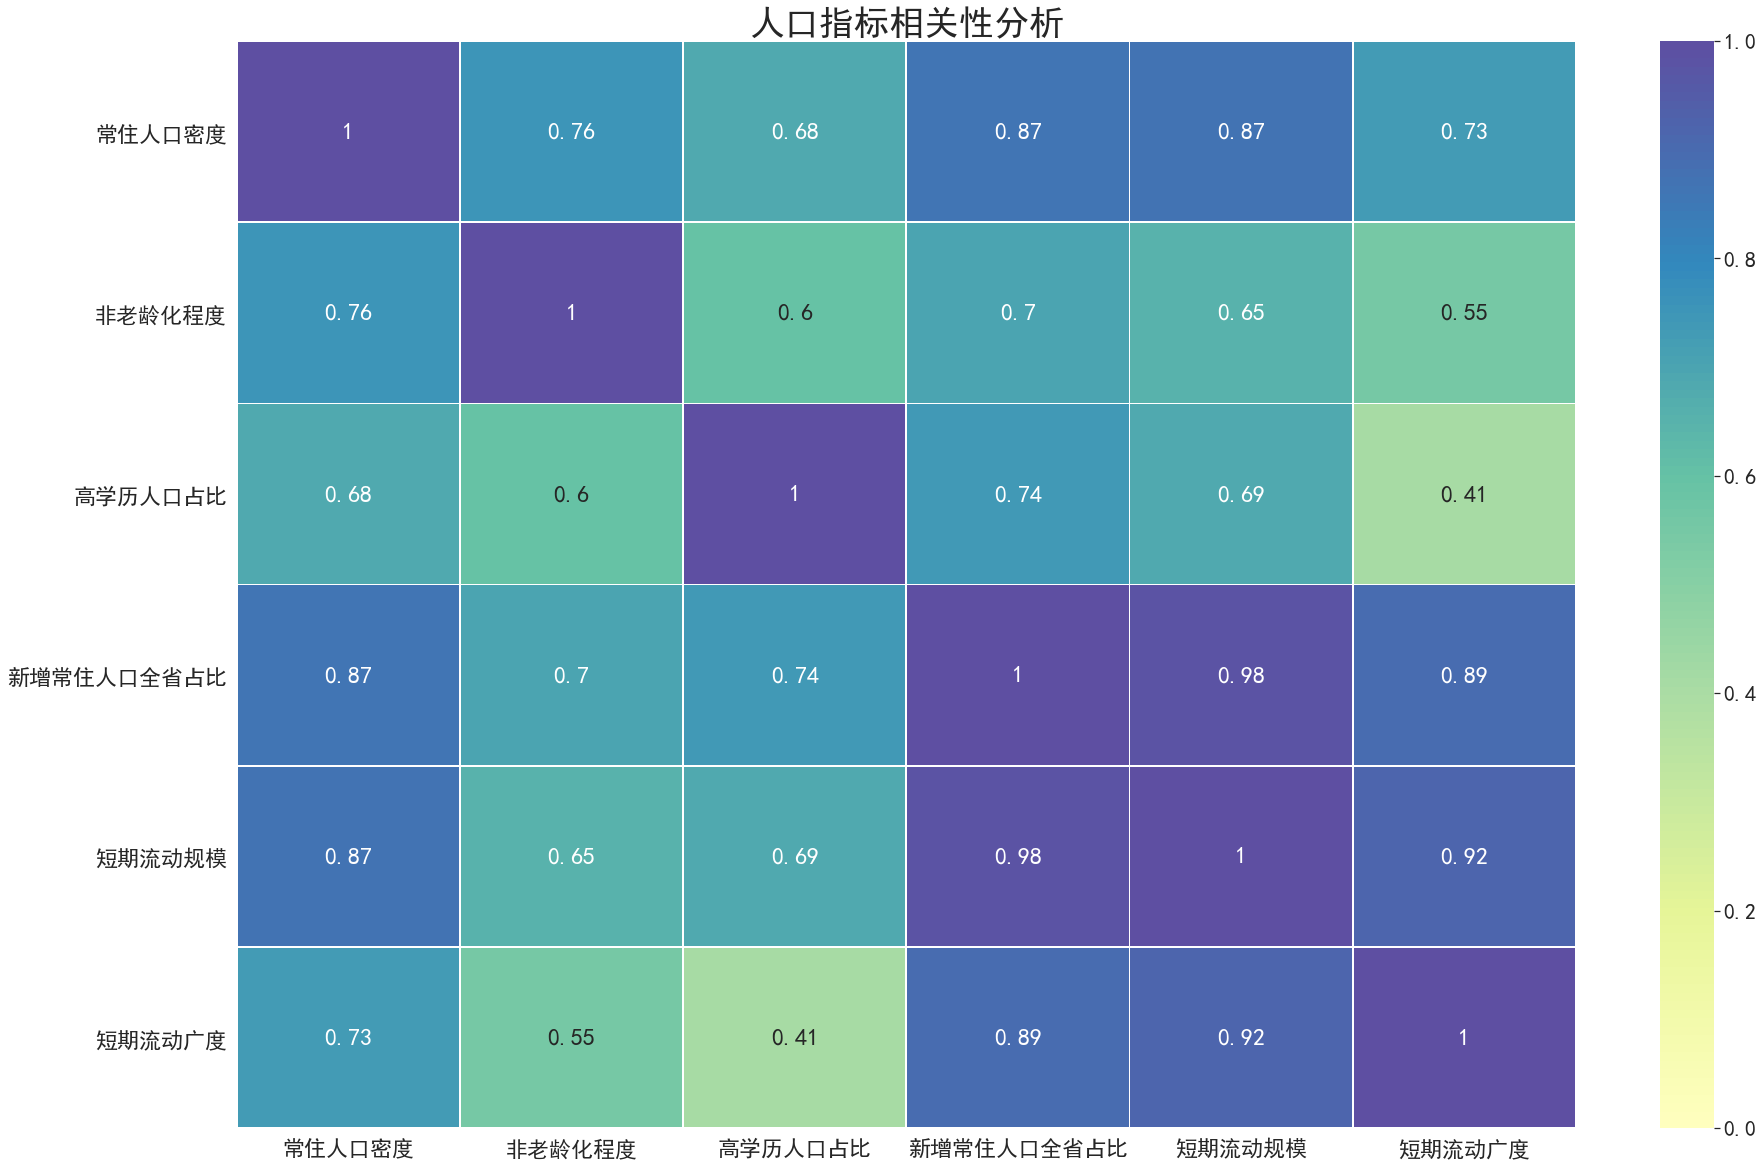

In [45]:
corr = pop.corr()
fig, ax = plt.subplots()
fig.set_size_inches(30, 20)

pop.reset_index(drop = True)
fig = sns.heatmap(corr, vmin=0, vmax=1,cmap = 'Spectral',annot=True, center=0, linewidths=0.7)
fig.set_title("人口指标相关性分析",fontsize = 35)

#heatmap.savefig('corr', dpi = 800)
#sns.heatmap(corr, annot=True, center=0,ax=ax)
plt.tick_params(axis='both',which='major',labelsize=22)
plt.legend(frameon=False, loc='best',fontsize = 20)
plt.tick_params(axis='both',which='major',labelsize=22)

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [42]:
plt.savefig('corr.png', dpi = 400)

<Figure size 432x288 with 0 Axes>

In [44]:
pop = filled_df[filled_df.columns[4:10]]
pop.reset_index(drop=True, inplace=True)
pop.head()

常住人口密度  非老龄化程度   高学历人口占比  新增常住人口全省占比    短期流动规模      短期流动广度
0  0.712663   92.44  0.077426    0.637417  181.4266  341.778238
1  0.095929   86.12  0.039870    0.010346   33.8271   72.223356
2  0.288310   87.53  0.050491    0.117025   46.2564  127.225575
3  0.229507   87.52  0.041002    0.001481   22.9594   60.386886
4  0.247890   86.73  0.037680    0.036360   27.3014   81.863632

In [76]:
data1 = pd.read_excel(r'C:\Users\Administrator\Desktop/自然和活力.xlsx',sheet_name = 'Sheet2')
filled_df = data1.copy()
#filled_df.loc[:, '接待入境游客人数（人次）'].replace([0], [41519], inplace=True)
#filled_df['全社会R&D支出占GDP比重'] = filled_df['全社会R&D支出占GDP比重'].str.strip('%').astype(float) / 100
#filled_df = filled_df.drop(['编号'],axis = 1)
#filled_df.set_index(['地市名称'], inplace=True)
filled_df.head(10)

新增常住人口全省占比     短期流动规模     短期流动广度     高铁联系指数    通勤时间指数  万人拥有体育设施数量  \
0   10.000000  10.000000  10.000000   9.746529  1.000000    7.697759   
1    1.284710   2.450372   2.683996   3.776696  2.915197    3.621550   
2    2.767387   3.086124   4.176814   7.276169  2.571177    9.307448   
3    1.161500   1.894496   2.362742   5.459806  5.117563    6.950488   
4    1.646262   2.116587   2.945643   6.904477  5.215479    6.587183   
5    1.256056   1.265818   1.323998  10.000000  2.808513    5.178184   
6    1.493879   2.632423   3.344660   6.821596  2.427081   10.000000   
7    1.714249   1.873658   2.340728   3.061263  2.021640    6.408772   
8    1.942693   1.650539   2.314457   1.000000  1.133720    4.192555   
9    1.329773   2.061391   2.362504   6.209774  3.447886    5.377402   

   万人拥有文化旅游设施数量  万人拥有商业服务设施数量   新增市场主体数量  万人拥有小微企业数量     营商环境指数  
0      5.956228      4.766154  10.000000    8.211835  10.000000  
1      3.987497      5.396153   5.006525    5.202347   2.550258  
2      8.737603     10.000000   5.832952    5.350286   4.100515  
3      5.599756      5.907958   7.651251    7.355258   2.256443  
4     10.000000      5.243959   6.247633    5.711933   1.773196  
5      4.784018      1.209805   3.721225    3.539804   1.715206  
6      7.880053      9.529198   9.578416    8.996720   2.349227  
7      5.000237      4.966449   4.815380    4.569620   3.451031  
8      5.404672      5.373426   6.817680    5.647964   2.438144  
9      2.500983      1.000000   6.298665    6.664767   3.953608

In [61]:
filled_df.reset_index(drop=True, inplace=True)

No handles with labels found to put in legend.


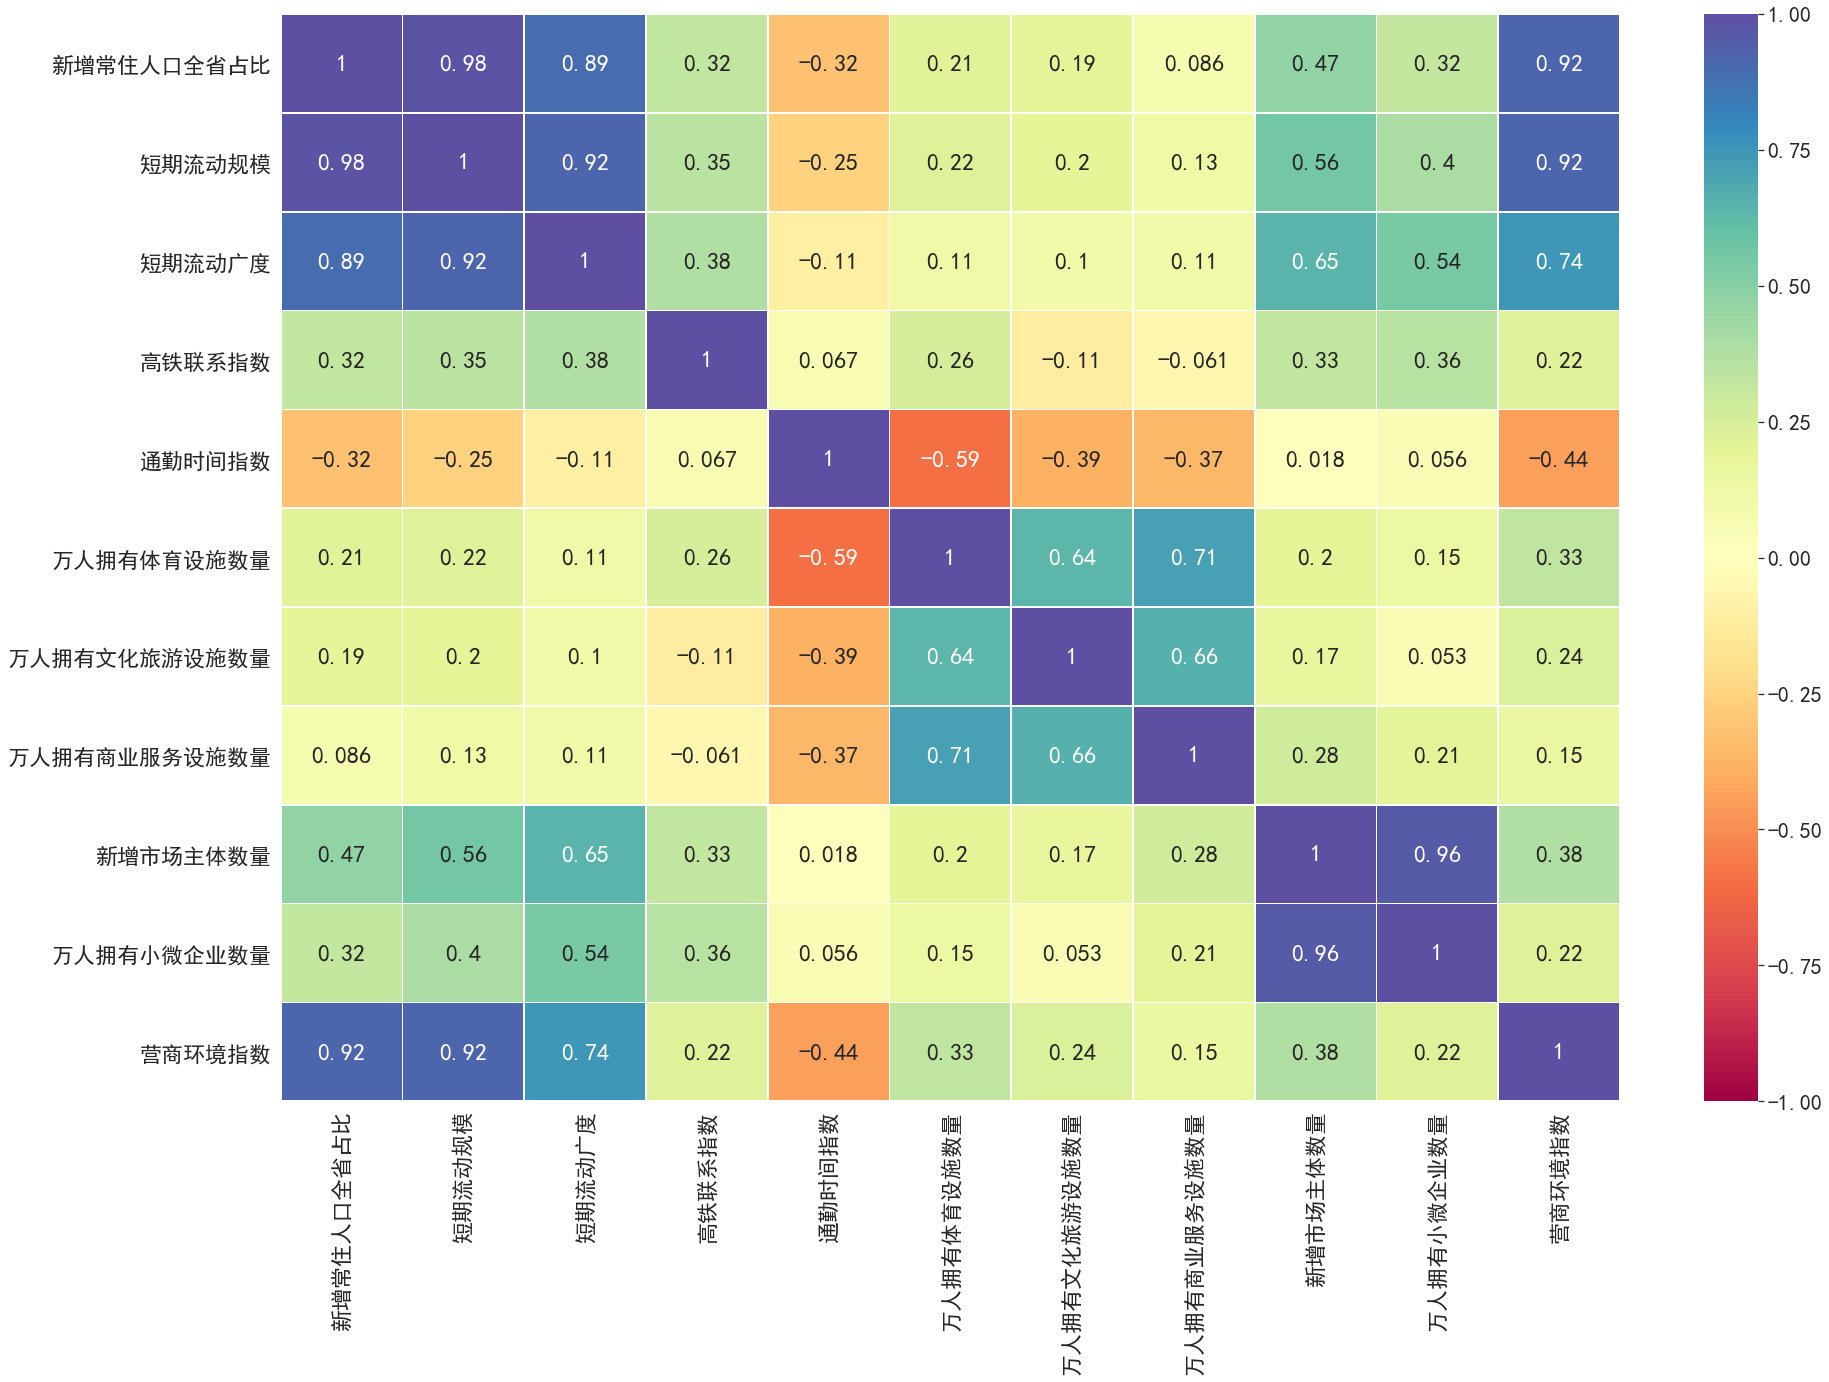

In [77]:
corr = filled_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(30, 20)

fig = sns.heatmap(corr, vmin=-1, vmax=1,cmap = 'Spectral',annot=True, center=0, linewidths=0.7)
#fig.set_title("人口指标相关性分析",fontsize = 35)

#heatmap.savefig('corr', dpi = 800)
#sns.heatmap(corr, annot=True, center=0,ax=ax)
plt.tick_params(axis='both',which='major',labelsize=22)
plt.legend(frameon=False, loc='best',fontsize = 20)
plt.tick_params(axis='both',which='major',labelsize=22)

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号